<a href="https://colab.research.google.com/github/yestrella14/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [83]:
df2 = df.drop('diagnosis', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [86]:
#Lets check the extra columns that shows NaNs. Should we drop it?
print(df2.shape)
df2['Unnamed: 32'].value_counts(dropna=False)

(569, 32)


NaN    569
Name: Unnamed: 32, dtype: int64

In [87]:
#Lets drop that extra column
df2 = df2.drop('Unnamed: 32', axis=1)
df2.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [88]:
# Perform K-Means Clustering on the Dataset
from sklearn.cluster import KMeans 



In [90]:
import seaborn as sns
#ax = sns.pairplot(df2)

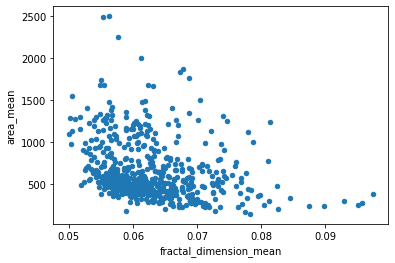

In [182]:
features = ['fractal_dimension_mean', 'area_mean']
df2[features].plot(kind="scatter", x=features[0], y=features[1]);

In [92]:
# Initialize an instance of the KMeans class from sklearn.
k = 2
model_kmeans = KMeans(n_clusters=k, max_iter=1)

# Fit the instantiated model to our sliced dataframe
model_kmeans.fit(df2[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
# Assign clusters back to our dataframe (labels)
df2['cluster'] = model_kmeans.labels_
df2.sample(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
408,90524101,17.99,20.66,117.80,991.7,0.10360,0.1304,0.12010,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.014800,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.3301,0.19740,0.3060,0.08503,1
448,911150,14.53,19.34,94.25,659.7,0.08388,0.0780,0.08817,0.02925,0.1473,0.05746,0.2535,1.3540,1.994,23.04,0.004147,0.02048,0.03379,0.008848,0.01394,0.002327,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463,0
266,8910251,10.60,18.95,69.28,346.4,0.09688,0.1147,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.03581,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587,0


In [94]:
# Get the centroids
centroids    =  model_kmeans.cluster_centers_

cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,0.063554,501.269575
1,0.060025,1217.740984


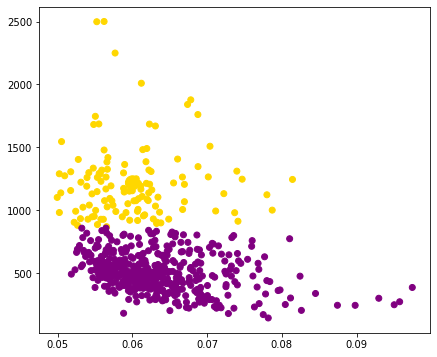

In [96]:
# Setup some colors for plotting
base_colors  =  ['purple', 'gold']
colors       =  [base_colors[centroid] for centroid in model_kmeans.labels_]

# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df2[features[0]], df2[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=200);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [113]:
print(df['diagnosis'].value_counts())
print(df2['cluster'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64
0    447
1    122
Name: cluster, dtype: int64


In [146]:
# Your Code Here

original = df['diagnosis']
cluster =df2['cluster']

df3 = pd.DataFrame(original)

df4 = df2.copy()
df4['original'] = original

df4 = df4.replace('M', 1)
df4 = df4.replace('B', 0)
df4.sample(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,original
190,874858,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,0.2860,2.1100,2.112,31.72,0.007970,0.13540,0.11660,0.016660,0.05113,0.011720,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.17720,0.5166,0.14460,0,1
199,877500,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130,0,1
551,923780,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,1.4670,1.994,17.85,0.003495,0.03051,0.03445,0.010240,0.02912,0.004723,12.02,28.26,77.80,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032,0,0
147,86973701,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,0.4220,1.9090,3.271,39.43,0.005790,0.04877,0.05303,0.015270,0.03356,0.009368,16.25,25.47,107.10,809.7,0.0997,0.2521,0.2500,0.08405,0.2852,0.09218,0,0
271,8910748,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,1.164,13.17,0.006472,0.01122,0.01282,0.008849,0.01692,0.002817,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022,0,0


In [150]:
#accuracy_percentage = 357/df['diagnosis'].value_counts().sum()
#accuracy_percentage

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [ ]:
##### Your Code Here #####

In [173]:
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize the dataset (default is normalization)
scaled_data = scaler.fit_transform(df2)

#Lets get the columns names
columns = df2.columns
# Turn it back into a dataframe.
df2_scaled = pd.DataFrame(scaled_data,columns=columns)
df2_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.914141
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.914141
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.914141
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-0.522428
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.914141


In [174]:
# So did that work? the mean should be zero
print(df2_scaled[features].mean())

# and the std should be one.
print(df2_scaled[features].std())

fractal_dimension_mean    5.408679e-16
area_mean                -1.900452e-16
dtype: float64
fractal_dimension_mean    1.00088
area_mean                 1.00088
dtype: float64


In [176]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(df2_scaled)
pca_features[:10]

array([[ 9.32686953,  2.15641753],
       [ 2.80574595, -3.88402613],
       [ 6.03073373, -1.05214489],
       [ 6.62315415, 10.63208388],
       [ 4.29875184, -2.04578359],
       [ 2.11785203,  4.15092239],
       [ 2.62739851, -2.81802811],
       [ 1.94726936,  2.51344825],
       [ 2.90832989,  3.65697446],
       [ 5.92102973,  8.10936697]])

In [177]:
df2_pca=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2'])
df2_pca.head()

,comp_1,comp_2
0,9.326870,2.156418
1,2.805746,-3.884026
2,6.030734,-1.052145
3,6.623154,10.632084
4,4.298752,-2.045784


In [180]:
k = 2
model = KMeans(n_clusters=k, max_iter=1)

model.fit(df_pca.values)

df2_pca['cluster'] = model.labels_

# Get our centroids
centroids    =  model.cluster_centers_

# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,-1.898522,0.162630
1,5.161994,-0.442185


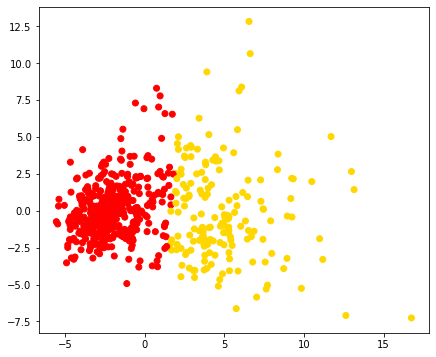

In [181]:
# Setup some colors for plotting
base_colors  =  ['red', 'gold']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [183]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.43106915, 0.18363548])

In [184]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6147046292993925

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project